## Interventions for Questions where diagram is Essential

Numbers:
1. No Errors: 24
2. Calculation Error: 1
3. Conceptual Error: 9
4. Misread Diagram: 12

Total: 46
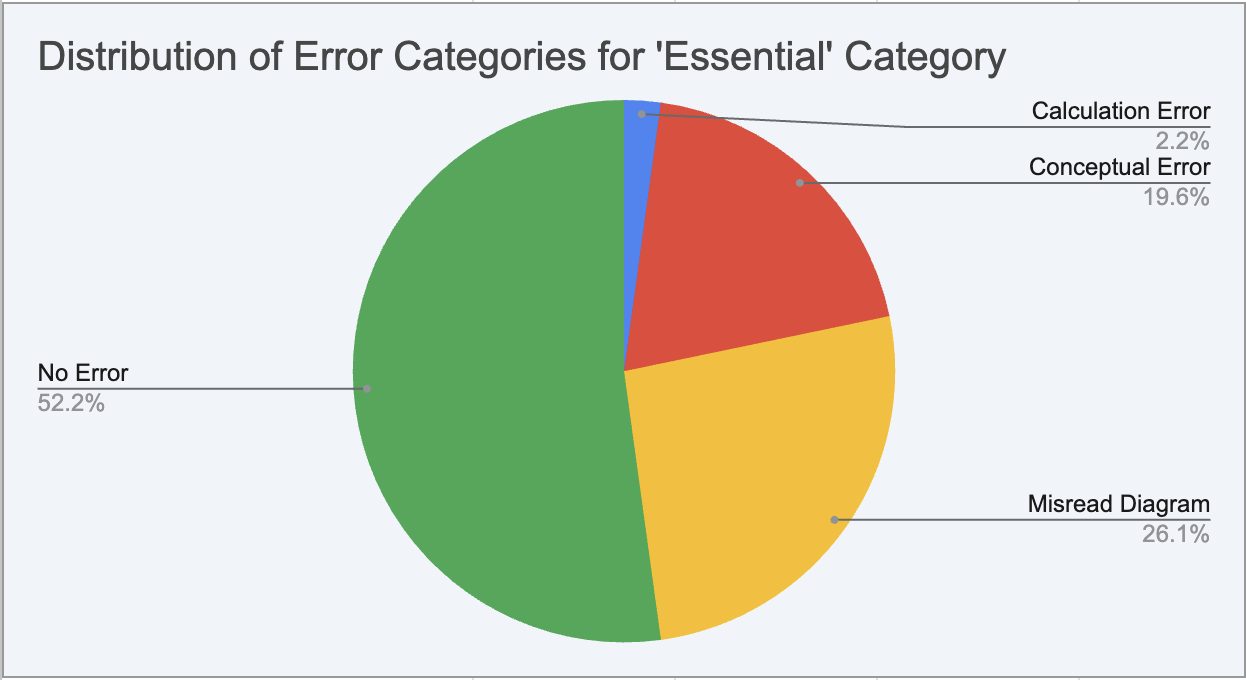

## Boilerplate Code

In [14]:
import json
import os
from dotenv import load_dotenv
import json
from pathlib import Path
from openai import OpenAI
import base64, mimetypes
from IPython.display import Image, display
import time
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')
import cv2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
history = []
client = OpenAI(api_key=OPENAI_API_KEY)
def reset_history(system_message=""):
    """Reset chat history with a fresh system prompt."""
    global history
    history = [
        {
            "role": "system",
            "content": [
                {"type": "input_text", "text": system_message}
            ],
        }
    ]
    return history


# Initialize default history
reset_history()


# -------------------------
# Helper: Encode images → data URLs
# -------------------------
def encode_images(image_paths):
    blocks = []
    for img_path in image_paths or []:
        mime, _ = mimetypes.guess_type(img_path)
        mime = mime or "image/png"
        with open(img_path, "rb") as f:
            b64 = base64.b64encode(f.read()).decode("utf-8")
        data_url = f"data:{mime};base64,{b64}"
        blocks.append({"type": "input_image", "image_url": data_url})
    return blocks


# -------------------------
# Chat Turn Function (images optional)
# -------------------------
def chat_turn(user_message: str, image_paths=None):
    # Build user's message content
    content_blocks = encode_images(image_paths)
    content_blocks.append({"type": "input_text", "text": user_message})

    # Add to history
    history.append({
        "role": "user",
        "content": content_blocks,
    })

    # Call model with all previous turns
    response = client.responses.create(
        model="gpt-5",
        input=history,
        reasoning={"effort": "low"},
        text={"verbosity": "low"}
    )

    # Extract assistant text response
    assistant_text = response.output_text

    # Append back into history
    history.append({
        "role": "assistant",
        "content": [
            {"type": "output_text", "text": assistant_text}
        ],
    })

    return assistant_text

## Misread Diagram

###Q53

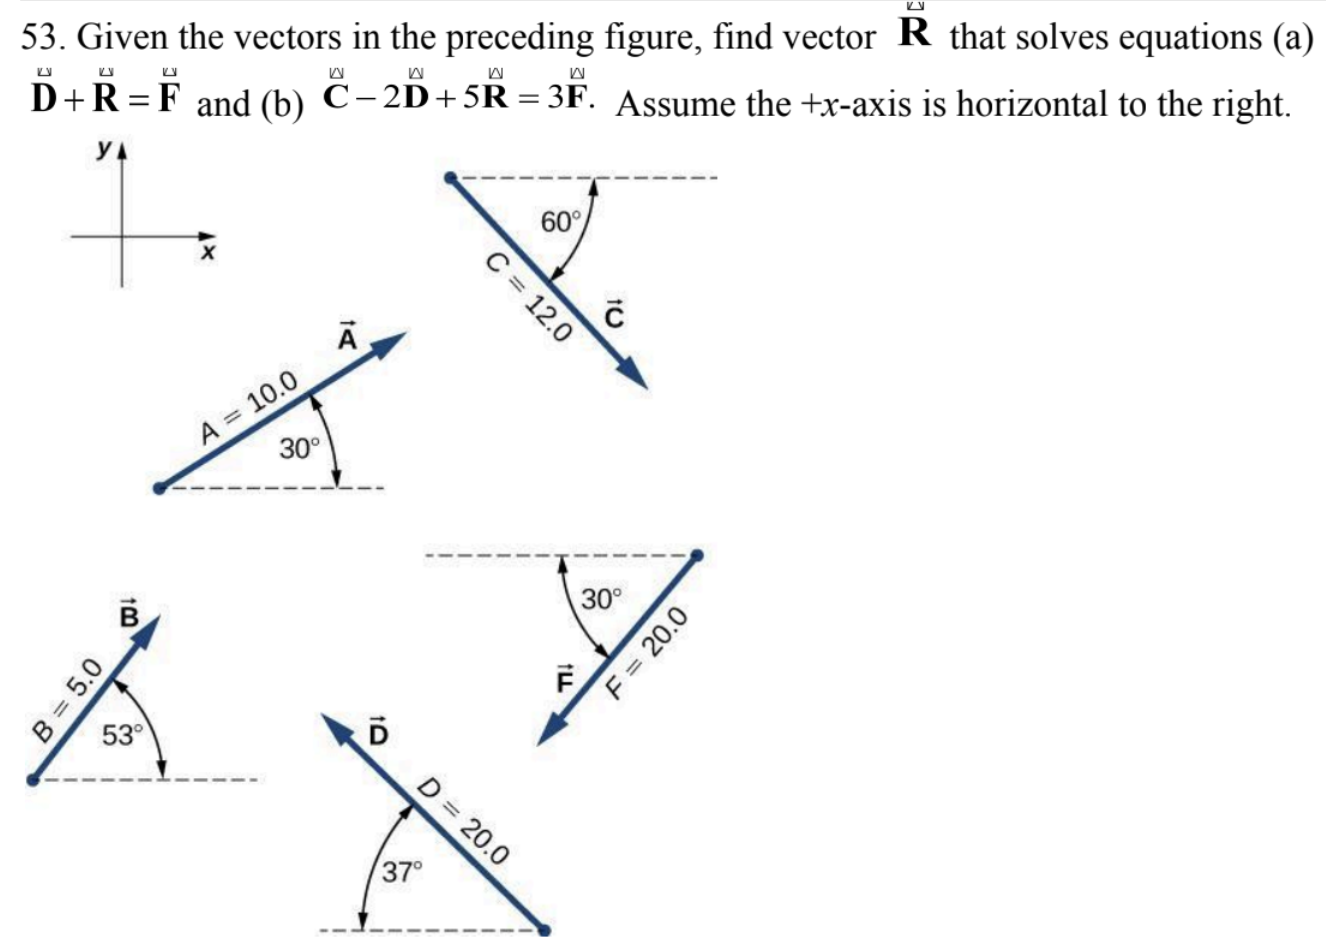

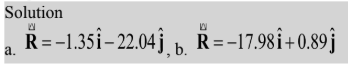

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png"
resp = chat_turn("Describe what you observe in the figure AND state your assumptions about the problem", image_paths=[img_path])
print(resp)

Observations
- 2D x–y axes shown; +x to the right, +y up.
- Five given vectors with magnitude and direction:
  - A: |A| = 10, directed 30° above +x (first quadrant).
  - B: |B| = 5, directed 53° above +x (first quadrant).
  - C: |C| = 12, directed 60° below +x (angle −60°, fourth quadrant).
  - D: |D| = 20, directed 37° above the −x direction (angle 180°−37° = 143°, second quadrant).
  - F: |F| = 20, directed 30° below the −x direction (angle 180°+30° = 210°, third quadrant).
- Unknown vector R is to be found from D + R = F and C − 2D + 5R = 3F.

Assumptions (to remove ambiguity)
- All vectors lie in the same plane.
- Angles are measured from +x; counterclockwise positive.
- Components computed as Vx = |V| cosθ, Vy = |V| sinθ with θ as above.
- Drawings are schematic; only the given magnitudes and angles are exact.


In [ ]:
prompt = (
        "Corrections: "
        "2 separate unknown vectors are to be found for both equations D + R = F and C − 2D + 5R = 3F"
    )
resp = chat_turn(prompt)
print(resp)

Results (angles measured CCW from +x)

Given
- D = 20 at 143° → D = (−15.9727, 12.0363)
- F = 20 at 210° → F = (−17.3205, −10.0000)
- C = 12 at −60° → C = (6.0000, −10.3923)

(a) D + R = F ⇒ R = F − D = (−1.3478, −22.0363)
- |R| ≈ 22.07
- θ ≈ −93.5° (or 266.5°)

(b) C − 2D + 5R = 3F ⇒ R = (3F − C + 2D)/5 = (−17.9814, 0.8930)
- |R| ≈ 18.00
- θ ≈ 177.2°


In [ ]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

Using components (angles CCW from +x):
- D = 20 at 143° → (−15.9727, 12.0363)
- F = 20 at 210° → (−17.3205, −10.0000)
- C = 12 at −60° → (6.0000, −10.3923)

(a) D + R = F ⇒ R = F − D = (−1.3478, −22.0363)
- |R| ≈ 22.07, angle θ ≈ −93.5° (or 266.5°)

(b) C − 2D + 5R = 3F ⇒ R = (3F − C + 2D)/5 = (−17.9814, 0.8930)
- |R| ≈ 18.00, angle θ ≈ 177.2°


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###95

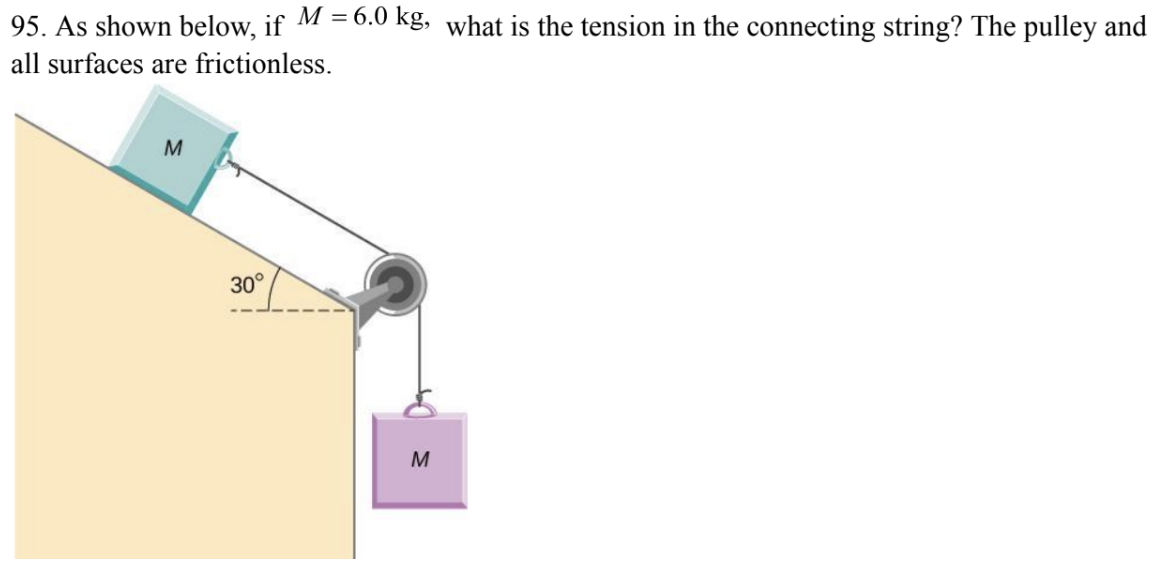

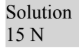

In [16]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_6_Applications_of_Newton_Laws_15/95/q.png"
resp = chat_turn("Describe what you observe in the figure AND state your assumptions about the problem", image_paths=[img_path])
print(resp)

- What’s shown: Two identical blocks (each M = 6.0 kg) are connected by a string over a pulley at the top edge of a 30° frictionless incline. One block rests on the incline; the other hangs vertically. The string runs along the slope to the pulley and down to the hanging mass.

- Assumptions:
  - Pulley is ideal (massless, frictionless), so the tension is the same on both sides and the string doesn’t slip.
  - String is light and inextensible, so both blocks share the same magnitude of acceleration and the string stays taut.
  - The incline and contact surfaces are frictionless; only gravity and tension act on the blocks (with a normal force on the incline block).
  - g ≈ 9.8 m/s² (unless otherwise specified).
  - Motion is along the slope for the upper block and vertical for the hanging block.


In [17]:
prompt = (
        "Corrections: "
        "If the block that hangs vertically moves downward then the block on the incline will move downward along the slope (not upward) "
    )
resp = chat_turn(prompt)
print(resp)

You’re right—thanks. With this geometry, if the hanging block moves downward, the string pulls the incline block toward the pulley, i.e., down the slope. So the linked motions are:
- Hanging block: downward
- Block on the incline: down the slope (toward the pulley)

All other assumptions remain: ideal (massless, frictionless) pulley, light inextensible string, frictionless surfaces, equal-magnitude acceleration for both masses, g ≈ 9.8 m/s².


In [18]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

Tension = 14.7 N.

Reason:
- Take positive down the slope for the incline block and downward for the hanging block; acceleration magnitude a is the same.
- Equations:
  - Incline block: m a = m g sin30° + T
  - Hanging block: m a = m g − T
- Add: 2 m a = m g (1 + sin30°) ⇒ a = 0.75 g.
- Then T = m(g − a) = m(0.25 g) = 6.0 × 0.25 × 9.8 ≈ 14.7 N.


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###101

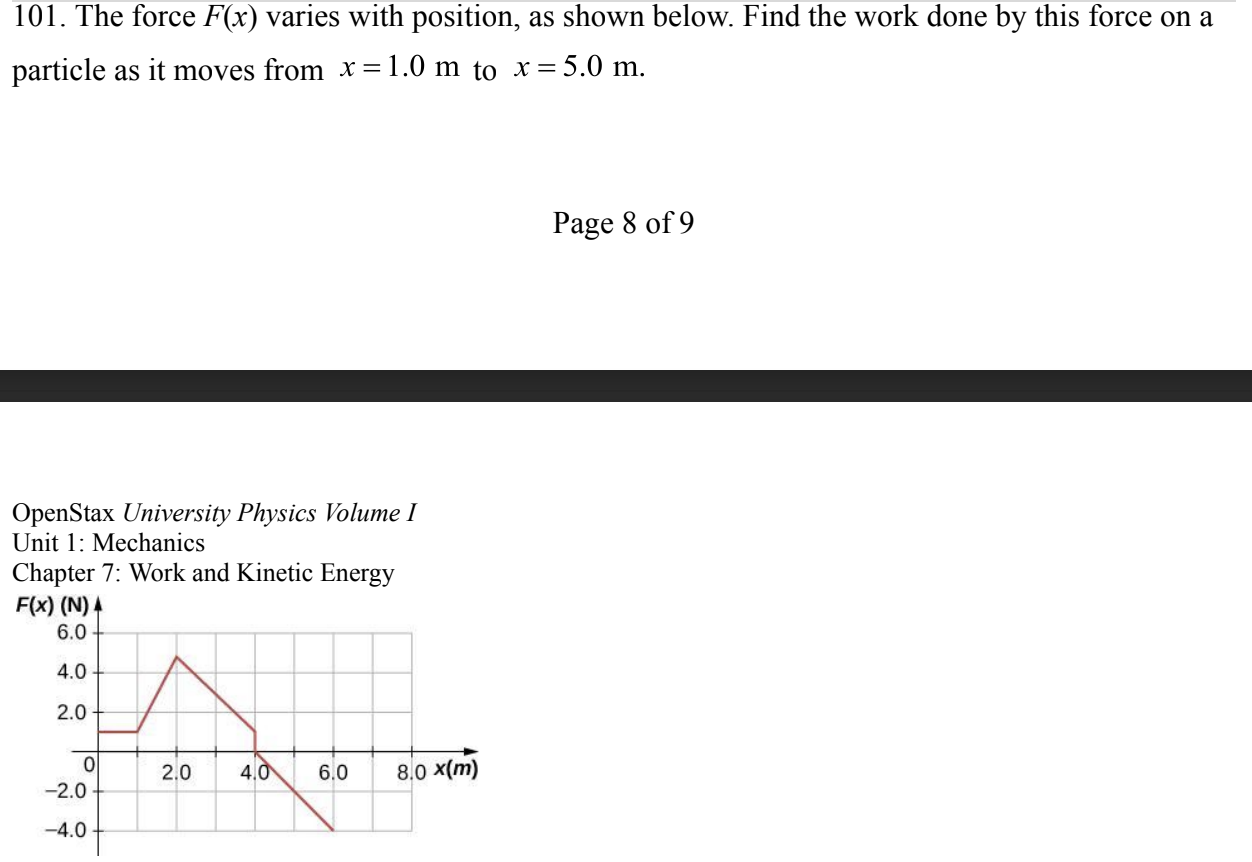

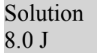

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_7_Work_and_Kinetic_Energy_4/101/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- It’s a force–position graph, F(x) in newtons vs x in meters (0–8 m).
- F(x) is piecewise linear:
  - From x=0 to 2 m it rises from about 1 N to 5 N (peak at x≈2 m).
  - From x=2 to 4 m it decreases linearly to about 1 N.
  - From x=4 to 6 m it continues downward, crossing F=0 near x=5 m and reaching about −4 N at x≈6 m.
- The problem asks for the work done as the particle moves from x=1.0 m to x=5.0 m.


In [ ]:
prompt = (
        "Corrections: "
        "From x = 0 to x = 1.0 m: The force is constant at F = 1.0 N (horizontal line) "
        "From x=1 to 2 m it rises from about 1 N to 5 N (peak at x≈2 m)."
        "At x=4 the force drops from 1 to 0. Then from x=4 to x=6 force linearly decreases from 0 to -4 "
    )
resp = chat_turn(prompt)
print(resp)

Updated description:

- 0 ≤ x < 1 m: F(x) = 1 N (horizontal line).
- 1 ≤ x ≤ 2 m: F increases linearly from 1 N to 5 N, peaking at 5 N at x = 2 m.
- 2 ≤ x ≤ 4 m: F decreases linearly from 5 N to 1 N.
- At x = 4 m: F drops abruptly from 1 N to 0.
- 4 ≤ x ≤ 6 m: F decreases linearly from 0 to −4 N (crosses negative).


In [ ]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

8 J


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###49

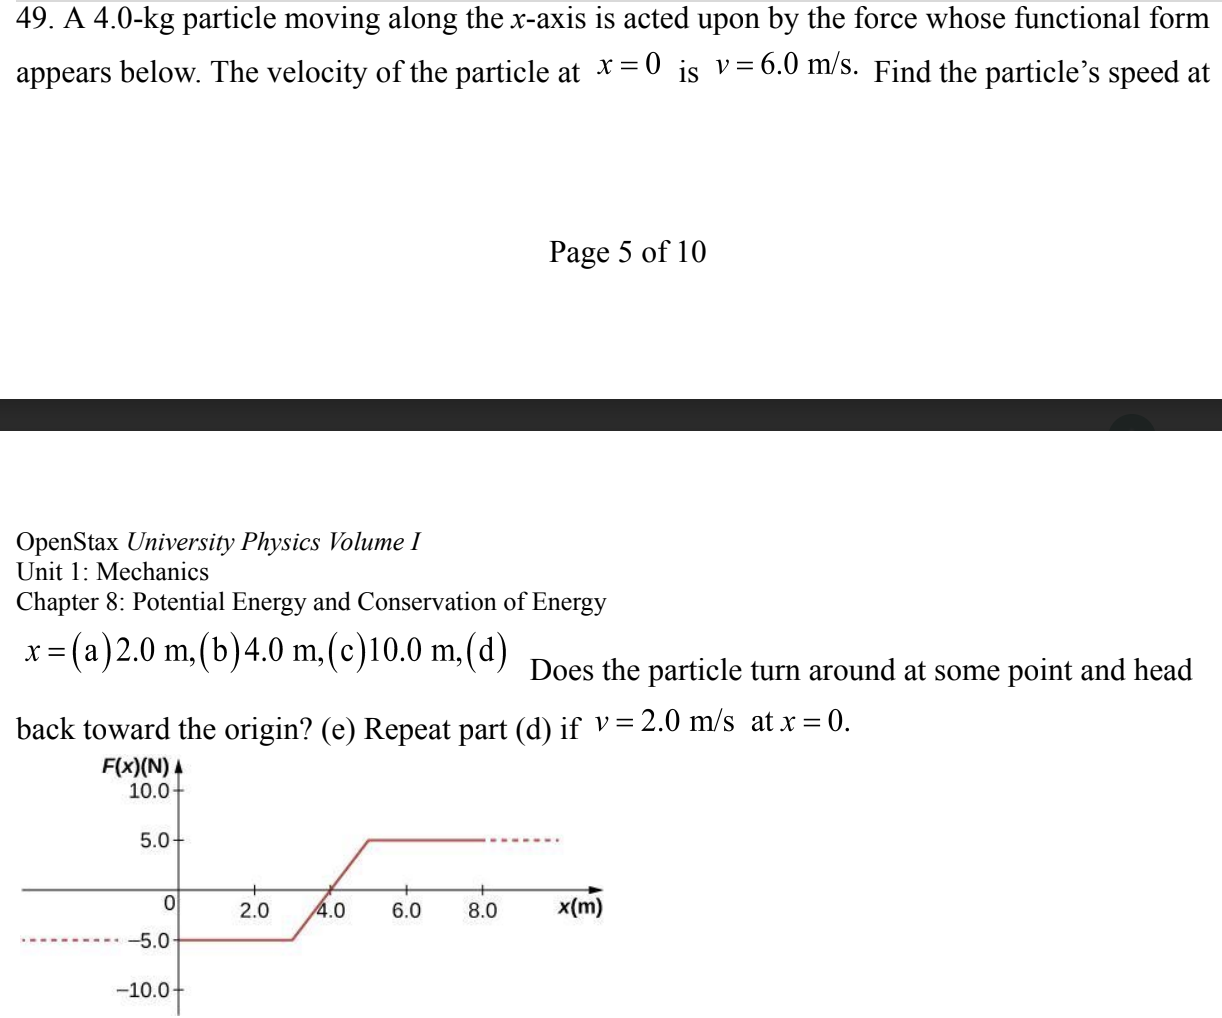

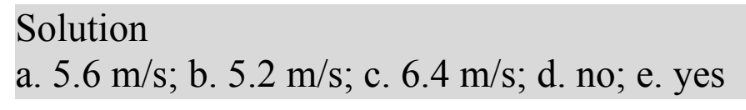

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_8_Potential_Energy_and_Conservation_of_energy_6/49/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- It’s a Force vs. position graph: F(x) in N on the vertical axis, x in meters on the horizontal.
- Piecewise force:
  - F = 0 from x = 0 to 2 m.
  - From x = 2 to 4 m, F decreases linearly from 0 to about −5 N.
  - From x = 4 to 6 m, F increases linearly from −5 N to +5 N (crossing F = 0 near x ≈ 5 m).
  - From x = 6 to 10 m, F is constant at +5 N.


In [ ]:
prompt = (
        "Corrections: "
        "From x = 0 to x = 3 m: The force is constant at F = -5.0 N (horizontal line) "
        "From x=3 to 5 m it rises from about -5 N to 5 N "
        "At x=5 onwards the force is constant at F = 5.0 N (horizontal line) "
    )
resp = chat_turn(prompt)
print(resp)

Got it. The figure is an F(x) vs x graph with:
- F = −5 N for 0 ≤ x < 3 m (horizontal line).
- F increases linearly from −5 N at x = 3 m to +5 N at x = 5 m.
- F = +5 N for x ≥ 5 m (horizontal line).


In [ ]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

Given m = 4.0 kg and v(0) = 6.0 m/s → K0 = 72 J.
Work W(x) from the graph:
- 0→3 m: W = −5x
- 3→5 m: adds 0 net (symmetric ramp; minimum at x=4: extra −2.5 J)
- ≥5 m: +5(x−5)

a) x = 2 m: W = −10 J → K = 62 J → v = sqrt(2K/m) = sqrt(31) ≈ 5.57 m/s.
b) x = 4 m: W = −17.5 J → K = 54.5 J → v ≈ 5.22 m/s.
c) x = 10 m: W = −15 + 0 + 25 = +10 J → K = 82 J → v = sqrt(41) ≈ 6.40 m/s.
d) No. Minimum cumulative work is −17.5 J (at x ≈ 4 m), so Kmin = 72 − 17.5 = 54.5 J > 0.
e) If v(0) = 2.0 m/s (K0 = 8 J): yes, it turns around where W = −8 J → −5x = −8 ⇒ x ≈ 1.6 m.


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###77

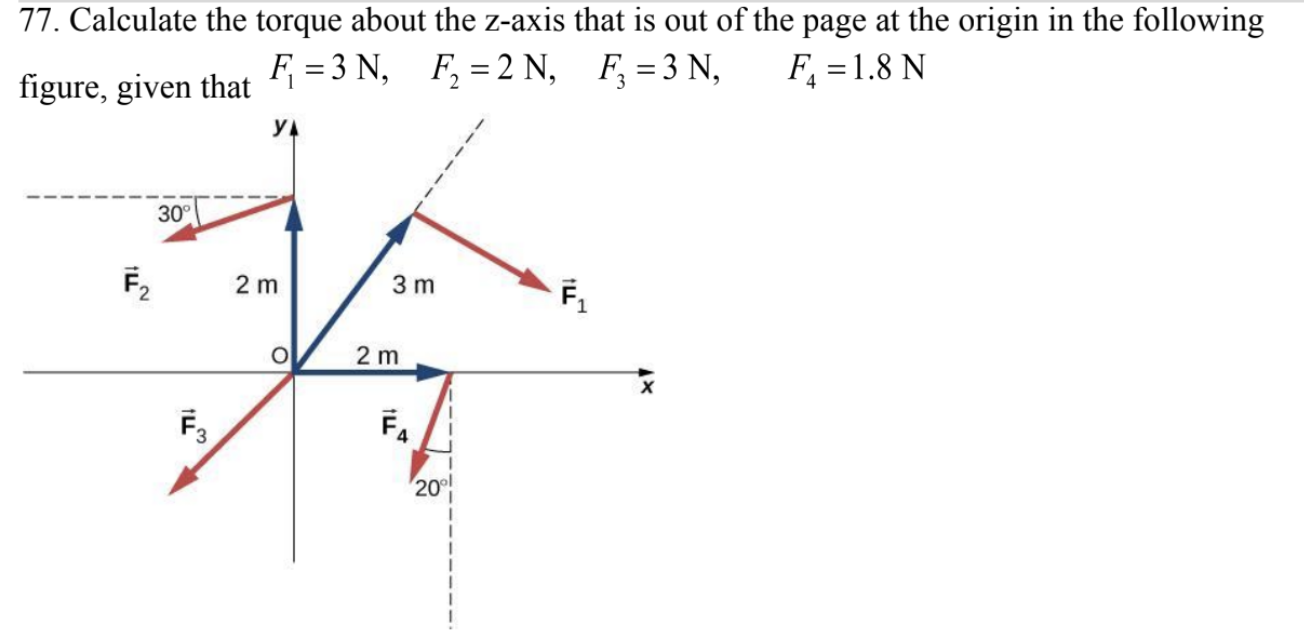

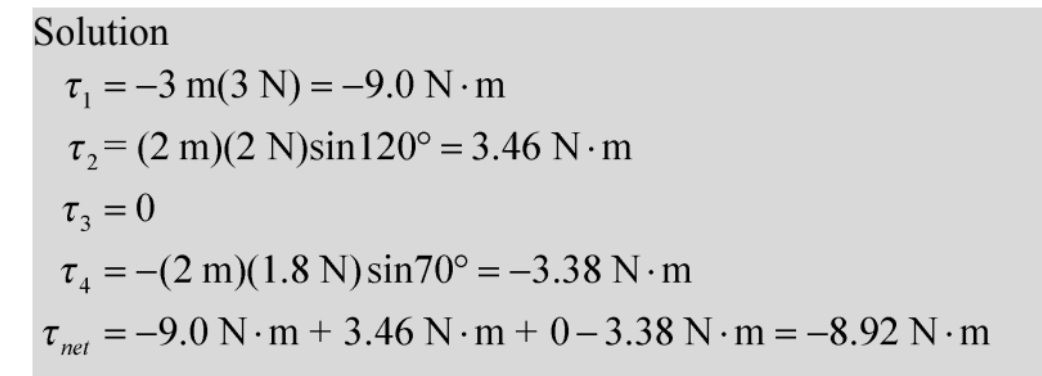

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_10_Fixed_Axis_Rotation_15/77/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- 2D x–y axes with origin O.
- Three blue position arms from O: 2 m straight up, 2 m to the right, and a 3 m arm into the first quadrant (about 60° above +x).
- Four red forces:
  - F1 = 3 N applied at the end of the 3 m arm, directed down-right along that arm.
  - F2 = 2 N applied at the top of the 2 m vertical arm, pointing left and slightly downward, 30° below the horizontal.
  - F3 = 3 N applied at O along the extension into the third quadrant, pointing down-left.
  - F4 = 1.8 N applied at the end of the 2 m rightward arm, pointing down-left, 20° from the local vertical.


In [ ]:
prompt = (
        "Corrections: "
        "Angle is not given for 3 m blue arm [assume it is 45 degree above +x] "
        "Assume that F1 is at angle of 90 degree with 3m blue arm "
    )
resp = chat_turn(prompt)
print(resp)

Updated observations (with your assumptions):
- Coordinate axes with origin O.
- Position arms from O:
  - 2 m straight up (+y).
  - 2 m straight right (+x).
  - 3 m at 45° above +x into the first quadrant.
- Forces (red):
  - F1 = 3 N applied at the end of the 3 m arm, oriented perpendicular to that arm (90° to it); direction is generally down-right relative to the arm’s tip.
  - F2 = 2 N at the top of the 2 m vertical arm, pointing leftward and 30° below the +x axis.
  - F3 = 3 N applied at O along the line into the third quadrant (down-left).
  - F4 = 1.8 N at the end of the 2 m rightward arm, pointing down-left, 20° from the local vertical.


In [ ]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

τz = Σ (rx Fy − ry Fx)

Positions:
- r1 = (3 cos45°, 3 sin45°) = (2.121, 2.121) m
- r2 = (0, 2) m
- r4 = (2, 0) m
- r3 at O ⇒ no torque

Forces:
- F1 = 3 N at −45° ⇒ (2.121, −2.121) N
- F2 = 2 N at 210° ⇒ (−1.732, −1.000) N
- F4 = 1.8 N, 20° from vertical pointing down-left ⇒ (−0.616, −1.692) N

Torques:
- τ1 = 2.121(−2.121) − 2.121(2.121) = −9.00 N·m
- τ2 = 0(−1.000) − 2(−1.732) = +3.46 N·m
- τ4 = 2(−1.692) − 0(−0.616) = −3.38 N·m

Total τz = −9.00 + 3.46 − 3.38 ≈ −8.9 N·m.

Answer: τz ≈ −8.9 N·m (into the page; magnitude 8.9 N·m).


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###77

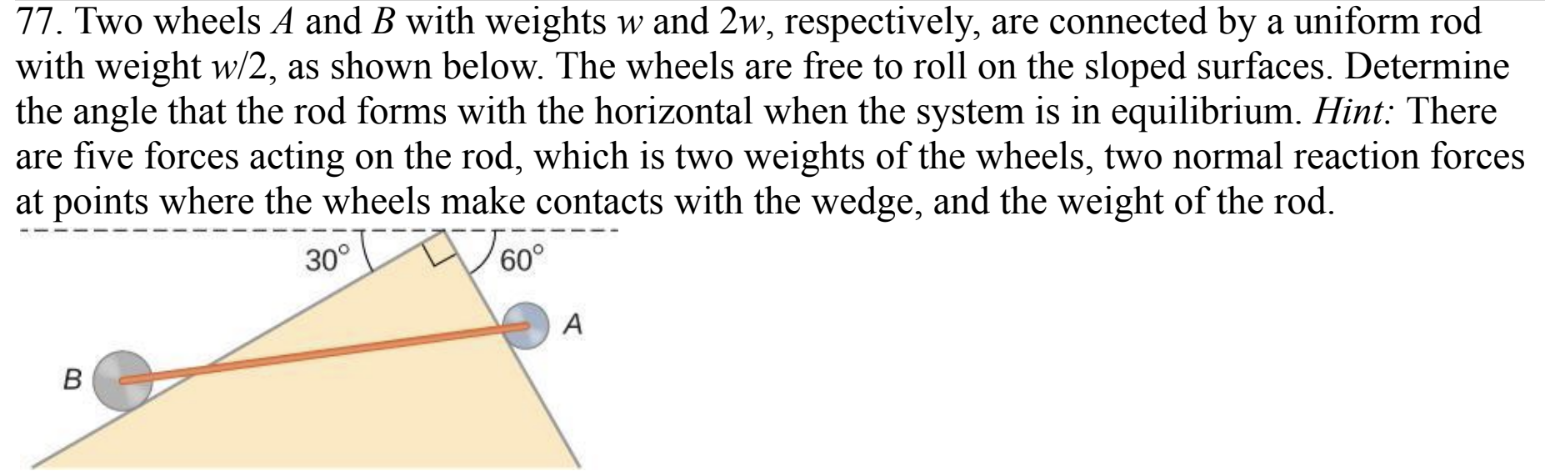

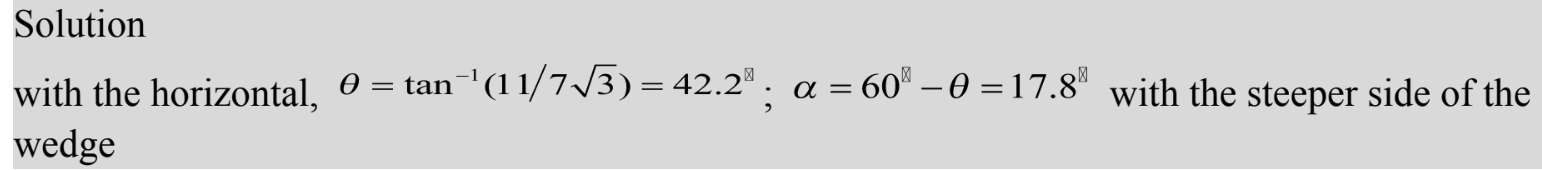

In [20]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/77/q.png"
resp = chat_turn("Describe what you observe in the figure AND state your assumptions about the problem", image_paths=[img_path])
print(resp)

- What I see: Two wheels, A on the 60° slope (to the right) and B on the 30° slope (to the left), are connected by a straight uniform rod that spans between their centers. The wedge has a 90° apex (30° on the left face, 60° on the right). Wheel A has weight w; wheel B has weight 2w. The rod has weight w/2 acting at its midpoint.

- Assumptions:
  - The wheels are small, rigid, and roll without friction on the slopes; thus each contact force is a normal reaction perpendicular to its slope and passes through the wheel center.
  - The rod is rigid, uniform, and pinned to the wheel centers; its own weight acts at its midpoint.
  - No other external forces; the system is in static equilibrium; gravity is uniform.
  - The pulley/axle frictions and rolling resistance are negligible; the rod makes a single straight line between the wheel centers with a well-defined angle to the horizontal.


In [ ]:
prompt = (
        "Corrections: "
        "Correction: The axis of rotation is at the top, touching the top end at the boundary of the sphere. And the rod is attached to the bottom of the sphere. Another way to think is that the entire sphere is between rod and axis of rotation"
    )
resp = chat_turn(prompt)
print(resp)

In [ ]:
prompt = (
        "Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Observation-based setup
- Let O be the apex of the wedge. The two ground reactions are along the normals to the planes; hence their lines of action are OA and OB. These two lines meet at O.
- For the system to be in equilibrium, the resultant of the remaining forces (the three weights: w at A, 2w at B, and w/2 at the rod’s center C) must pass through the same point O. Therefore, the total weight must act on the vertical through O, i.e. the x-coordinate of the system’s center of mass (with O as origin) must be zero.

Geometry and condition on x-coordinates
- Take the right face at −60° and the left face at +30° to the horizontal. Then:
  x_A = (1/2) r_A,    x_B = −(√3/2) r_B,
  where r_A and r_B are the distances of A and B from O along their faces.
- The rod’s center C has x_C = (x_A + x_B)/2.
- Zero x-moment of all weights about the vertical through O gives:
  w x_A + 2w x_B + (w/2) x_C = 0
  ⇒ (5/4) x_A + (9/4) x_B = 0
  ⇒ 5 x_A + 9 x_B = 0
  ⇒ 5(1/2) r_A + 9[−(√3/2) r_B] = 0
  ⇒ r_A

In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###79

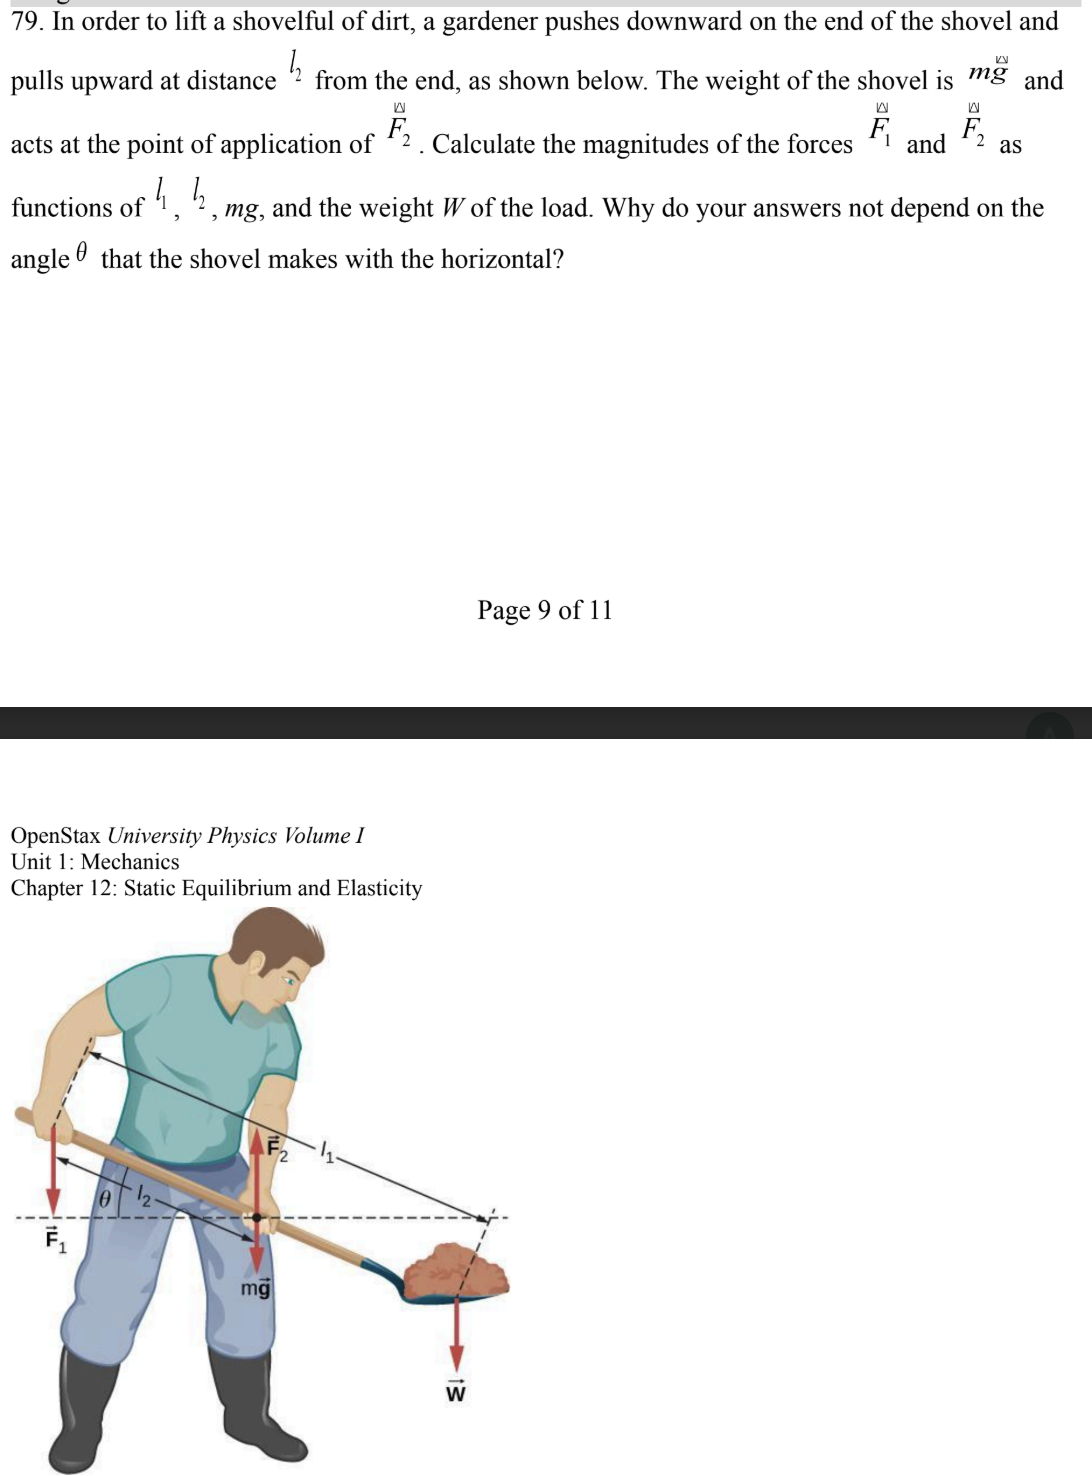

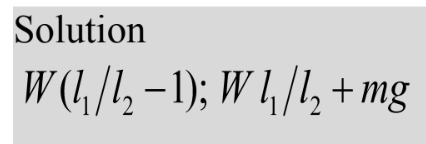

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/79/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- A person is lifting a shovel loaded with dirt.
- The shovel handle is at an angle θ to the horizontal.
- A downward force F1 is applied at the far end of the handle (left).
- An upward pull F2 is applied closer to the shovel’s middle.
- The shovel’s own weight mg acts downward at the same point as F2.
- The dirt’s weight W acts downward at the blade (right end).
- Lever arms are marked: l2 between F1 and the F2/mg point, and l1 between that point and the load at the blade.


In [ ]:
prompt = (
        "Correction: l₁ is Distance from the end (where F₁ acts) to the load (where W acts)"
    )
resp = chat_turn(prompt)
print(resp)

Got it. Corrections:
- l1 is the distance from the handle end where F1 is applied to the load at the blade where W acts.
- l2 is the distance from that same handle end (F1 point) to the point where F2 (upward) and the shovel’s weight mg (downward) act.


In [ ]:
prompt = (
        "Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Step 1: Choose the end where F1 is applied as the pivot.

Step 2: Torque equilibrium about that end (CCW +):
F2 l2 sinθ − mg l2 sinθ − W l1 sinθ = 0
⇒ F2 = mg + (W l1 / l2)

Step 3: Vertical force equilibrium:
F2 − F1 − mg − W = 0
⇒ F1 = F2 − mg − W = W(l1/l2 − 1)

Answer:
- F2 = mg + W(l1/l2)
- F1 = W(l1/l2 − 1)

The angle θ cancels because each torque contains the same factor sinθ, so the results are independent of θ.


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###81

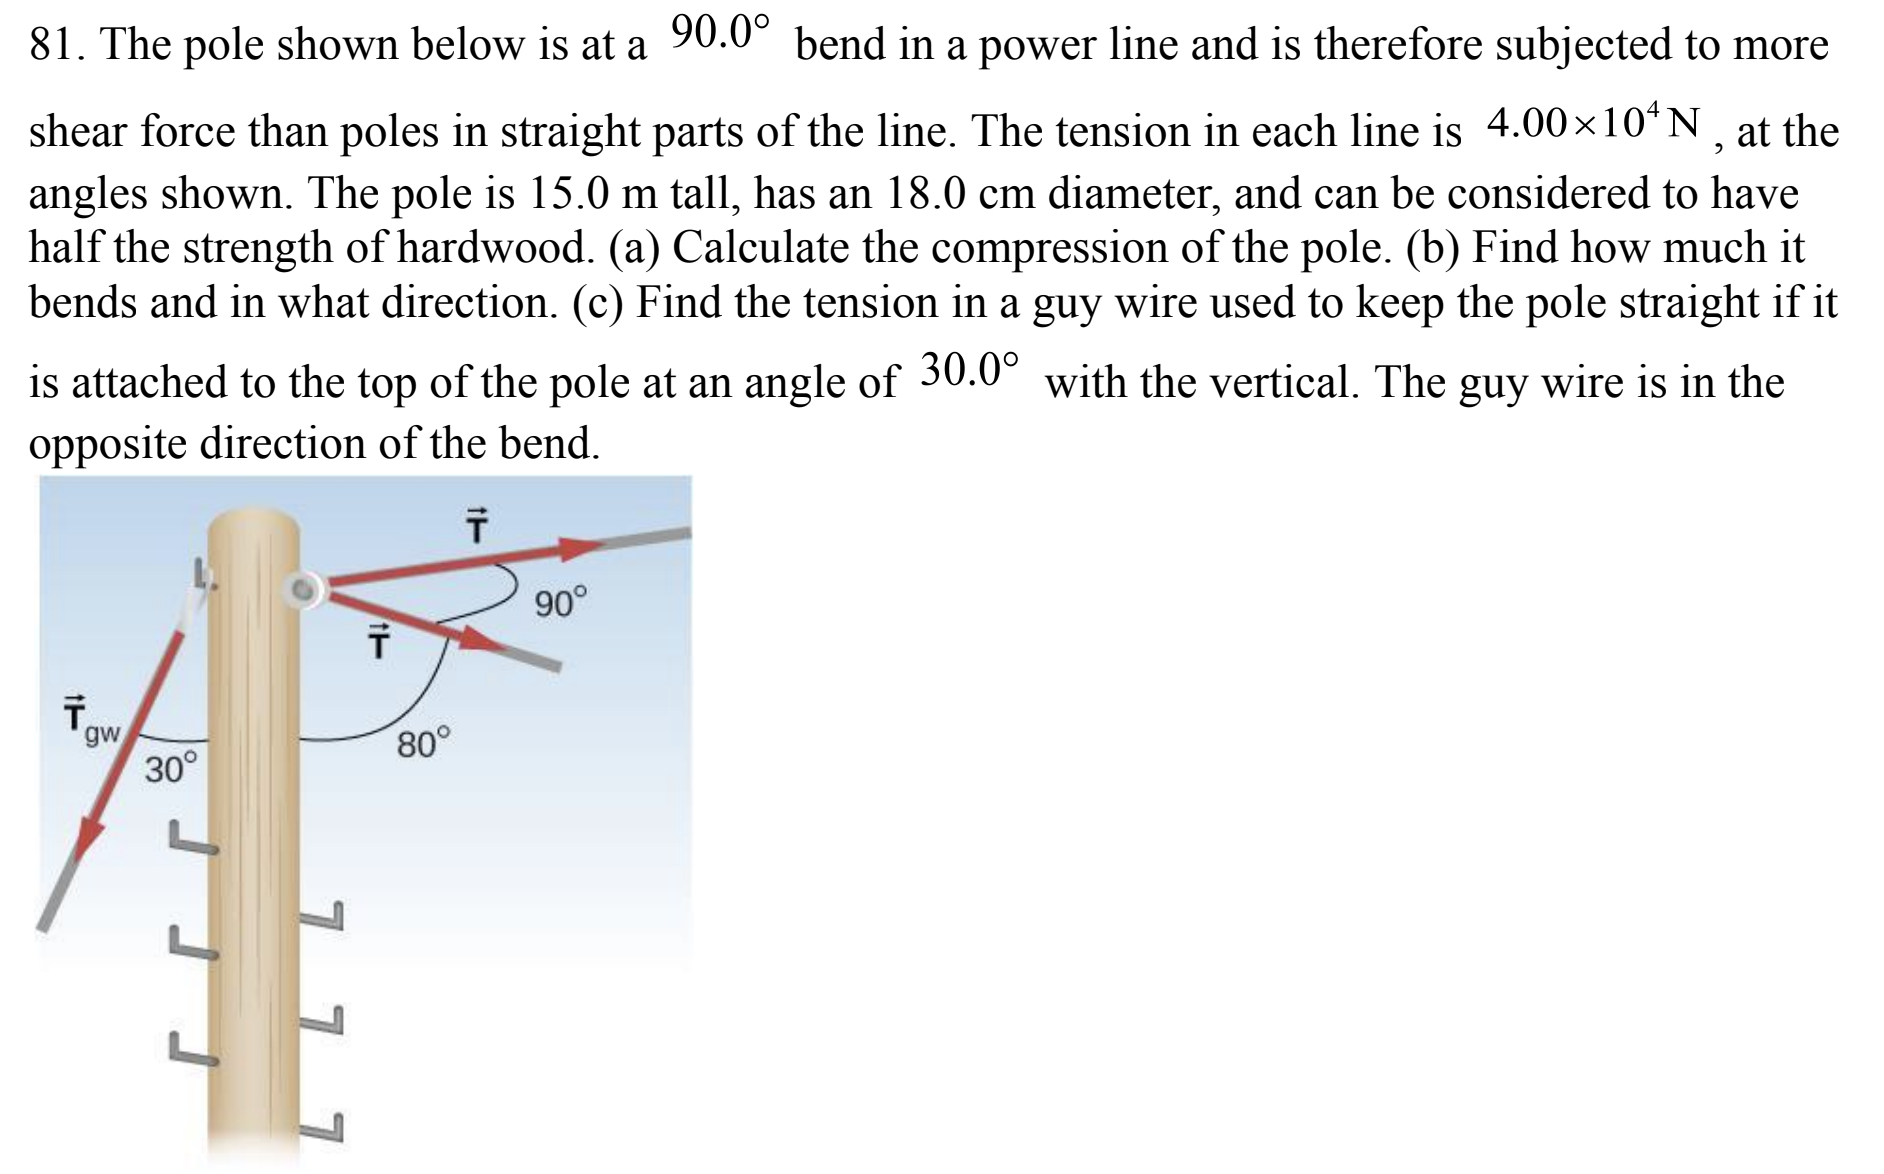

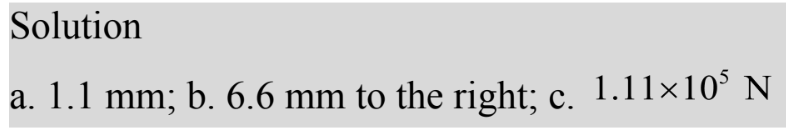

In [21]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/81/q.png"
resp = chat_turn("Describe what you observe in the figure AND state your assumptions about the problem", image_paths=[img_path])
print(resp)

- What I see: A vertical wooden utility pole. Two transmission-line spans are attached near the same height on the pole. Each span exerts a tension T = 4.00×10^4 N along the direction of the wire. The two spans meet at the pole with a 90° change in direction (plan view). One span is slightly downward from the attachment; the other is nearly horizontal, with the relative inclination between the two shown as 80°. A guy wire may be attached near the top on the side opposite the bend, making 30° with the vertical.

- Assumptions:
  - The two line tensions have equal magnitude (4.00×10^4 N) and act at the same point on the pole along the directions indicated; no other forces from the conductors.
  - The pole is a uniform vertical circular cylinder: height 15.0 m, diameter 0.18 m, material with compressive strength equal to 0.5×(hardwood strength). Its self‑weight is neglected unless needed for compression.
  - The guy wire, when used, is massless and in tension only, attached at the top, in

In [ ]:
prompt = (
        "Correction: "
        "Only the 2 wires making 90 degree angle with each other are coplanar "
        "Both of those wires are making angle of 80 degree with pole and pointing downward to the ground "
        "The wire with tension labeled T_gw is also pointing downward to ground making angle of 30 degree with pole "
        "Calculate compression using only vertical tension components "
        "For 'bending' in the Elasticity chapter, use Shear Deformation not the beam bending formula "
        "Young's Modulus (E) for Hardwood is 15 x 10^9 N/m^2"
        "Wood is anisotropic (it has grain). Its shear strength is independent of its tensile strength "
        "Shear Modulus for Hardwood is 10^10 N/m^2 Read the question carefully again before solving the question"
    )
resp = chat_turn(prompt)
print(resp)

- (a) Compression of the pole (from vertical components only):
  Fv = 2 T cos80° = 2(4.00×10^4)(0.17365) = 1.389×10^4 N
  A = π(0.09)^2 = 2.5447×10^-2 m^2
  ΔL = Fv L /(A E) = (1.389×10^4)(15)/(2.5447×10^-2·1.5×10^10)
     = 5.46×10^-4 m ≈ 0.55 mm

- (b) Bend (shear deformation from horizontal resultant of the two lines):
  Horizontal resultant V = √2 T sin80° = √2(4.00×10^4)(0.9848) = 5.57×10^4 N
  Lateral deflection δ = V L /(A G) = (5.57×10^4·15)/(2.5447×10^-2·1.0×10^10)
     = 3.29×10^-3 m ≈ 3.3 mm
  Direction: toward the inside of the 90° bend (bisecting the two line directions).

- (c) Guy-wire tension to keep the pole straight (cancel horizontal resultant):
  T_gw sin30° = V ⇒ T_gw = 2V = 1.11×10^5 N.


In [ ]:
prompt = (
        "Read the question again and Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Step 1: Geometry and data
- Each power-line tension: T = 4.00×10^4 N.
- Both lines lie in the same plane, are 90° apart, and each makes 80° with the vertical pole, pointing downward.
- Pole: L = 15.0 m, diameter d = 0.18 m → area A = π(d/2)^2 = π(0.09)^2 = 2.5447×10^-2 m^2.
- Take “half the strength of hardwood” → use half the moduli:
  E = 7.5×10^9 N/m^2, G = 5.0×10^9 N/m^2.

(a) Compression (use only vertical components)
- Vertical force on pole: Fv = 2 T cos80° = 2(4.00×10^4)(0.17365) = 1.389×10^4 N.
- Axial shortening: ΔL = Fv L /(A E)
  = (1.389×10^4 × 15.0)/(2.5447×10^-2 × 7.5×10^9)
  = 1.09×10^-3 m ≈ 1.09 mm.

(b) Bending (shear deformation from horizontal components)
- Resultant horizontal force from the two lines:
  V = √2 T sin80° = √2(4.00×10^4)(0.9848) = 5.57×10^4 N.
- Lateral deflection (simple shear): δ = V L /(A G)
  = (5.57×10^4 × 15.0)/(2.5447×10^-2 × 5.0×10^9)
  = 6.6×10^-3 m ≈ 6.6 mm.
- Direction: toward the inside of the 90° bend, along the bisector of the two line 

In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###53

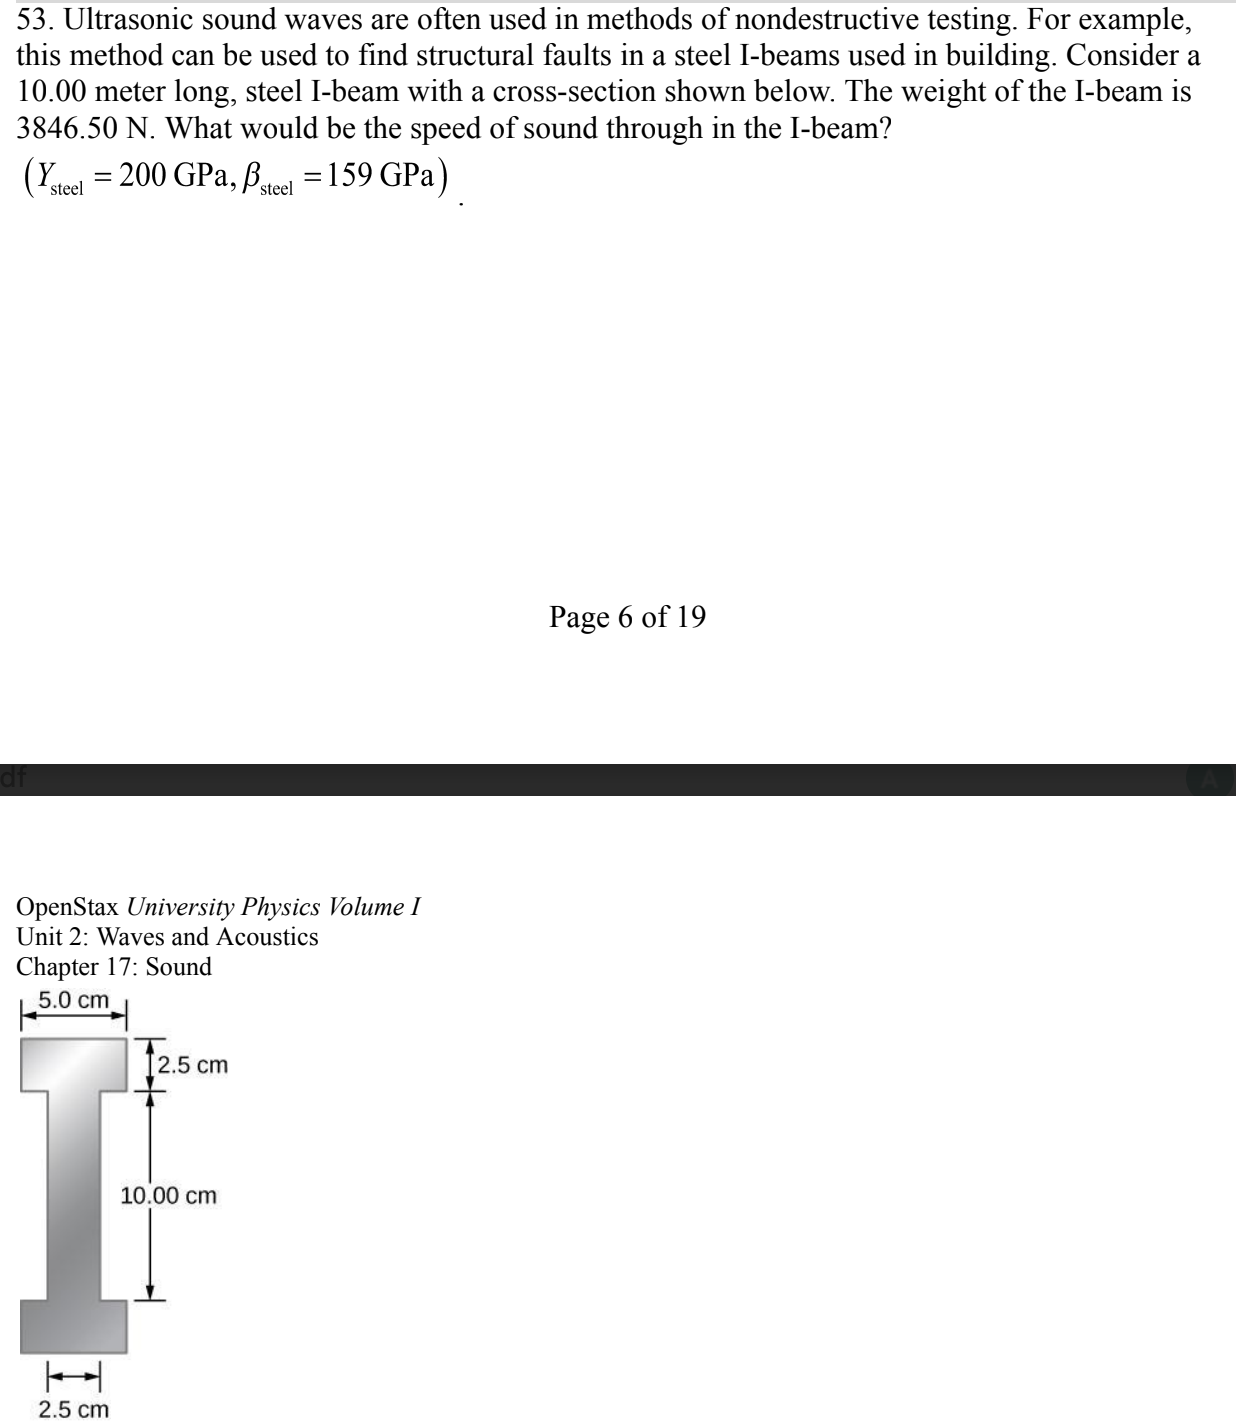

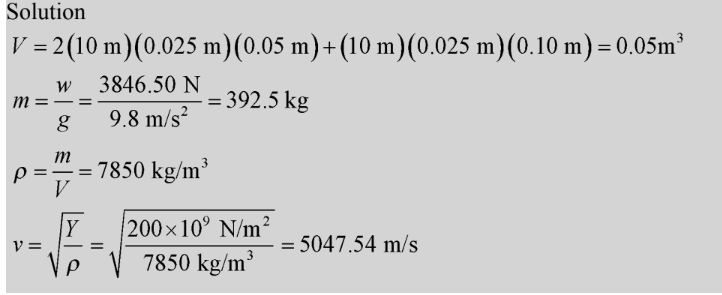

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_17_Sound_4/53/q.png"
prompt = (
        "Describe what you observe in the figure "
    )
resp = chat_turn(prompt, image_paths=[img_path])
print(resp)

Observations about the figure:
- It shows the cross‑section of a steel I‑beam.
- Overall height (flange‑to‑flange) is labeled 10.00 cm.
- Flange width is labeled 5.0 cm.
- Flange thickness appears to be 2.5 cm.
- Web thickness also appears to be 2.5 cm.
- The beam length is 10.00 m; its weight is 3846.50 N.

Assumptions I will use:
- The I‑beam is uniform, isotropic steel with given elastic constants (Young’s modulus Ysteel = 200 GPa; bulk modulus βsteel = 159 GPa).
- Sound propagates longitudinally along the beam’s length (rod‑like longitudinal wave), so the relevant speed is v = √(Y/ρ).
- Density ρ will be found from the beam’s mass (W/g) and its volume (length × cross‑sectional area from the given dimensions).
- Effects of damping, transverse modes, and boundary conditions at the ends are neglected; temperature effects ignored.


In [ ]:
prompt = (
        "Correction: "
        "This observation is incorrect: Overall height (flange‑to‑flange) is labeled 10.00 cm. "
        "The length of web (middle part) or beam length is 10 cm "
    )
resp = chat_turn(prompt)
print(resp)

Thanks for the correction—here’s the updated summary.

Observed (corrected) geometry:
- Flange width: 5.0 cm.
- Flange thickness: 2.5 cm.
- Web thickness: 2.5 cm.
- Web (middle) length between flanges: 10.0 cm.
- Overall height = 10.0 cm + 2×2.5 cm = 15.0 cm.
- Beam length (along its axis): 10.00 m (from the text).
- Weight: 3846.50 N.

Assumptions:
- Uniform, isotropic steel; Y = 200 GPa, β = 159 GPa.
- Longitudinal sound propagation along the 10 m beam; use v = √(Y/ρ).
- Density from mass (W/g) and volume (length × cross‑sectional area from the above dimensions).
- Ignore damping, transverse modes, and temperature effects.


In [ ]:
prompt = (
        "Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Step 1: Cross‑sectional area
- Flanges: 2 × (5.0 cm × 2.5 cm) = 25.0 cm²
- Web: (2.5 cm × 10.0 cm) = 25.0 cm²
- Total A = 50.0 cm² = 0.0050 m²

Step 2: Volume and density
- Length L = 10.00 m
- Volume V = A L = 0.0050 × 10.00 = 0.050 m³
- Mass m = W/g = 3846.50 / 9.81 = 392.25 kg
- Density ρ = m/V = 392.25 / 0.050 = 7.845 × 10³ kg/m³

Step 3: Longitudinal wave speed in a rod
- v = √(Y/ρ) with Y = 200 GPa = 2.00 × 10¹¹ Pa
- v = √(2.00 × 10¹¹ / 7.845 × 10³) ≈ √(2.55 × 10⁷) ≈ 5.05 × 10³ m/s

Answer: v ≈ 5.05 km/s.


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

##Contextual Errors

###115

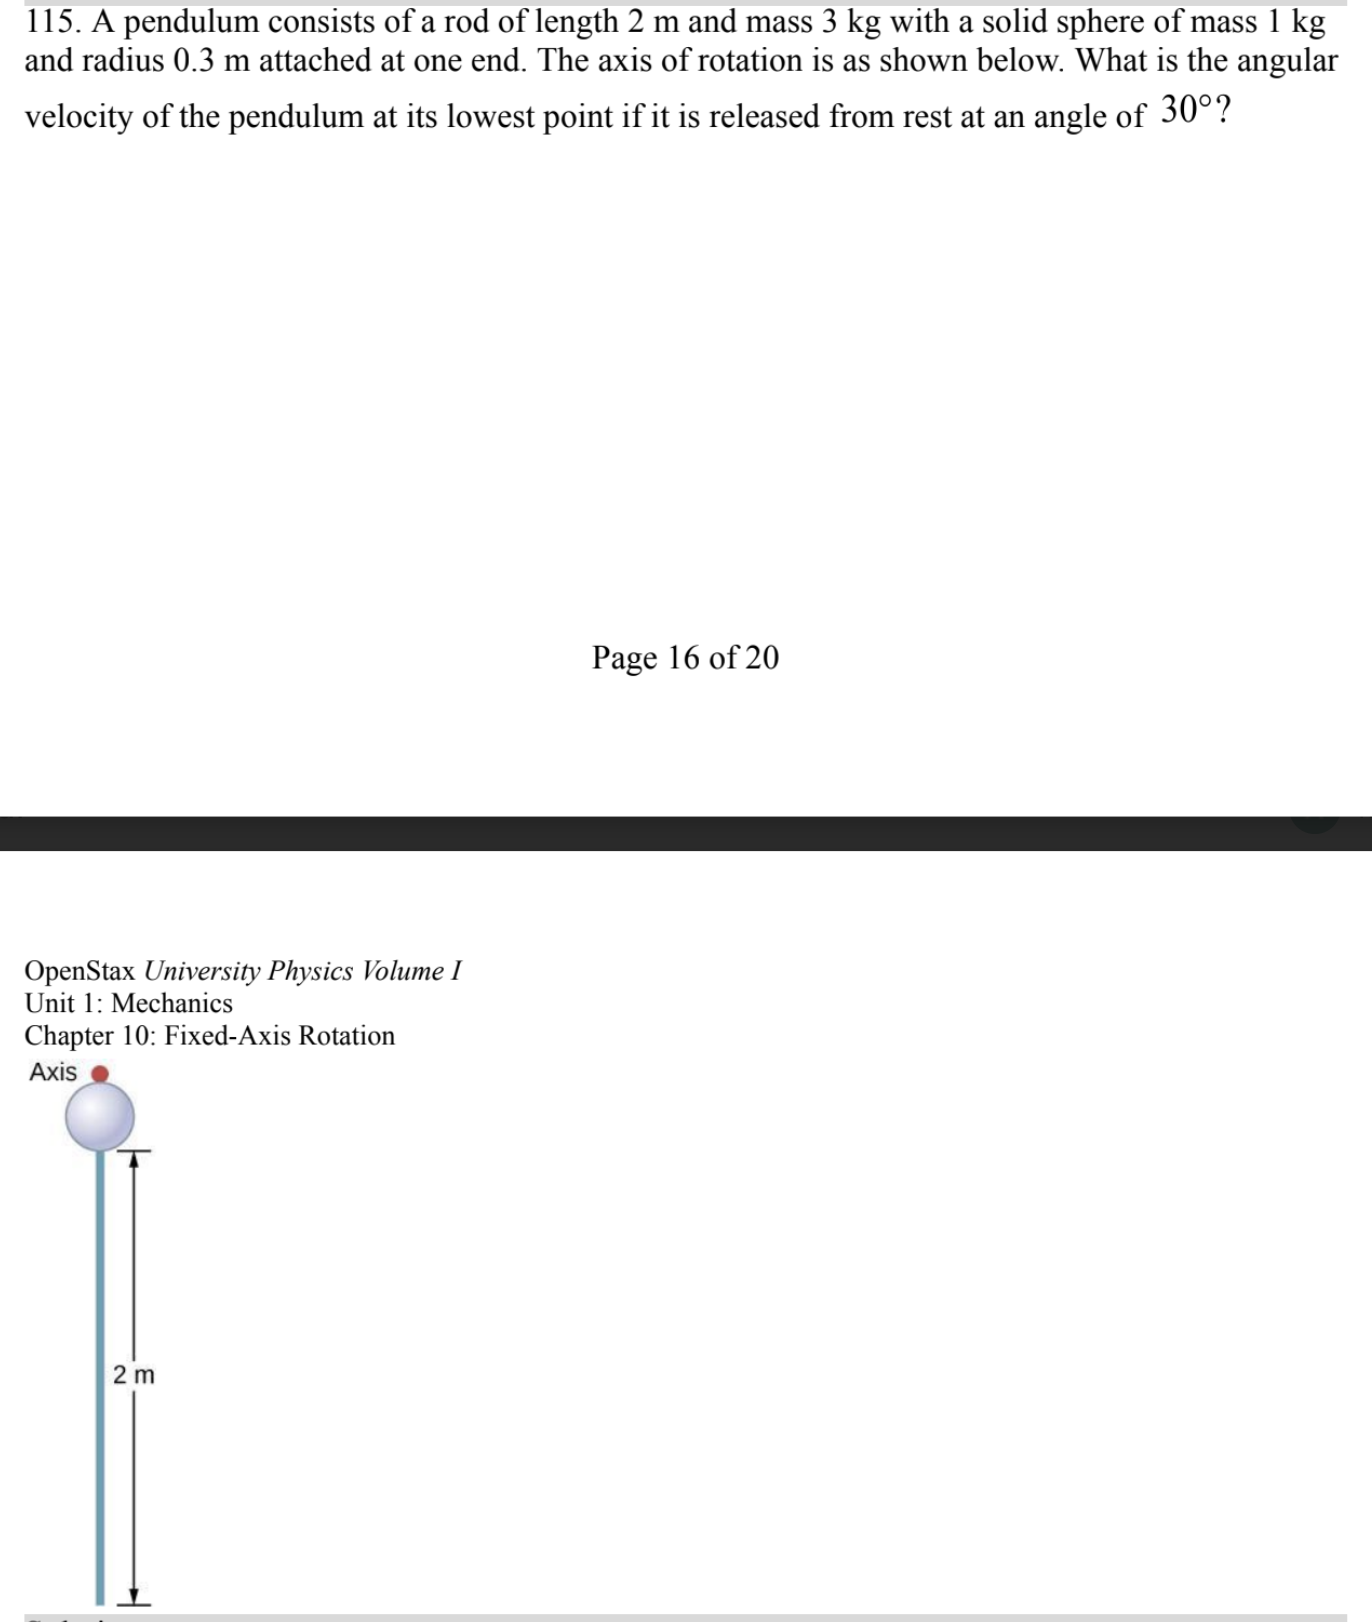

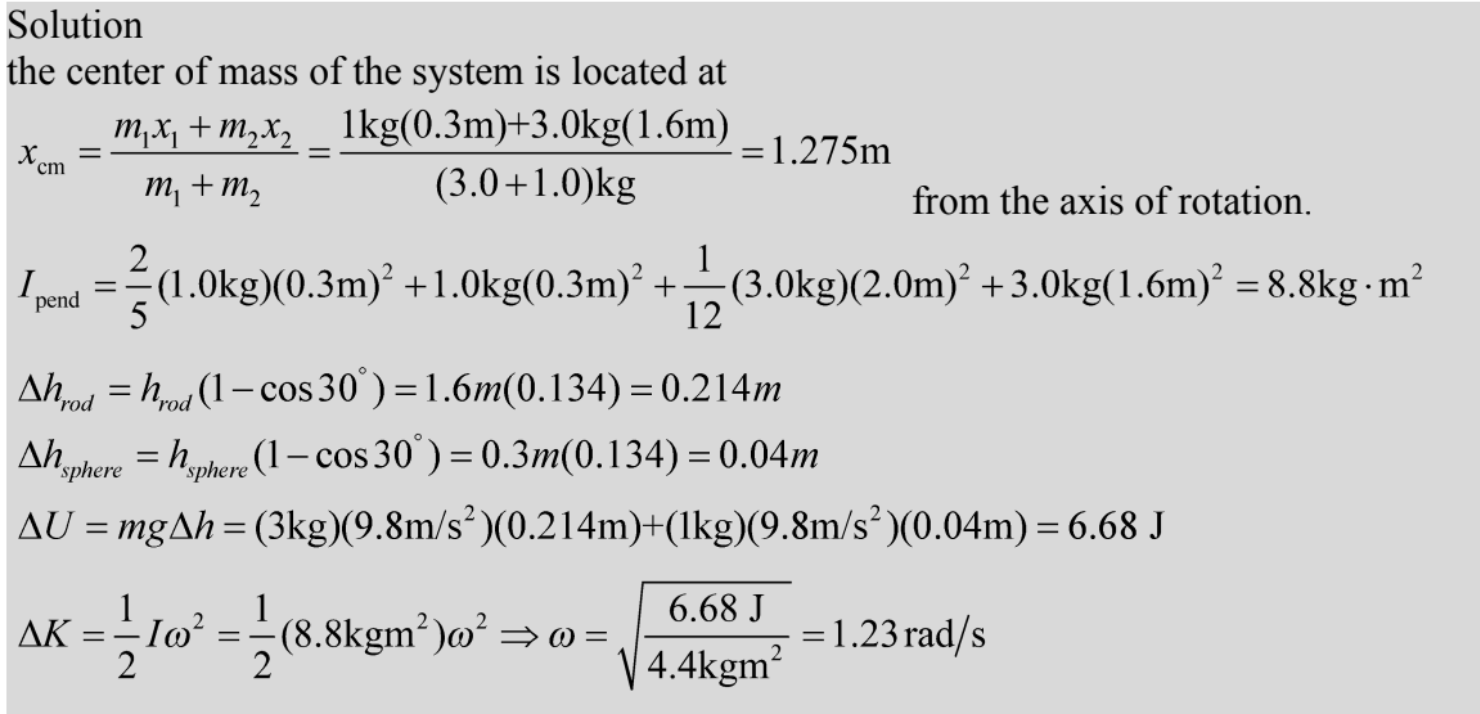

In [19]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_10_Fixed_Axis_Rotation_15/115/q.png"
resp = chat_turn("Describe what you observe in the figure AND state your assumptions about the problem", image_paths=[img_path])
print(resp)

- What I see: A compound (physical) pendulum made of a uniform rod (length 2 m, mass 3 kg) with a solid sphere (mass 1 kg, radius 0.3 m) attached at the top end. The assembly swings in a vertical plane about a fixed horizontal axis shown by a dot near the top of the sphere.

- Assumptions:
  - The pivot/axis is frictionless and fixed; the stringless body swings as a rigid unit.
  - The axis passes through a point tangent to the top of the sphere, so the sphere’s center is 0.3 m from the axis. The rod is attached to the sphere’s bottom; its center of mass is 0.3 + (2/2) = 1.3 m below the axis.
  - The rod is uniform; the sphere is a rigid solid sphere.
  - Air resistance is negligible; released from rest at 30° from the vertical.


In [ ]:
prompt = (
        "Corrections: "
        "Correction: The axis of rotation is at the top, touching the top end at the boundary of the sphere. And the rod is attached to the bottom of the sphere. Another way to think is that the entire sphere is between rod and axis of rotation"
    )
resp = chat_turn(prompt)
print(resp)

Got it. The axis is at the very top, tangent to the sphere. The rod attaches to the bottom of the sphere, so the sphere sits between the axis of rotation and the rod. The rod is 2 m long and hangs vertically below the sphere.


In [ ]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

1.23 rad/s


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###123

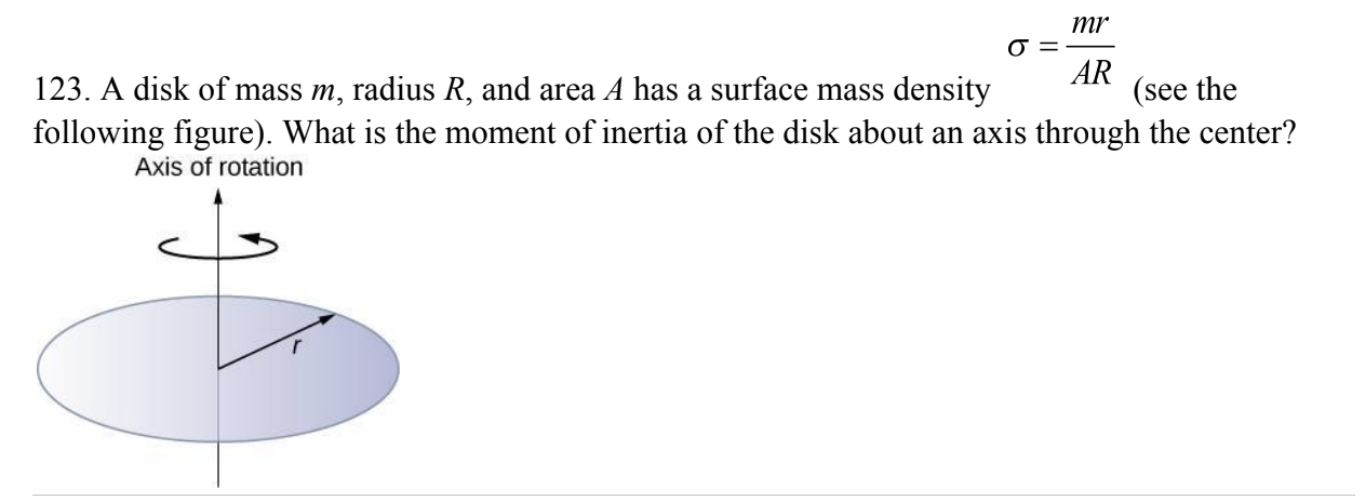

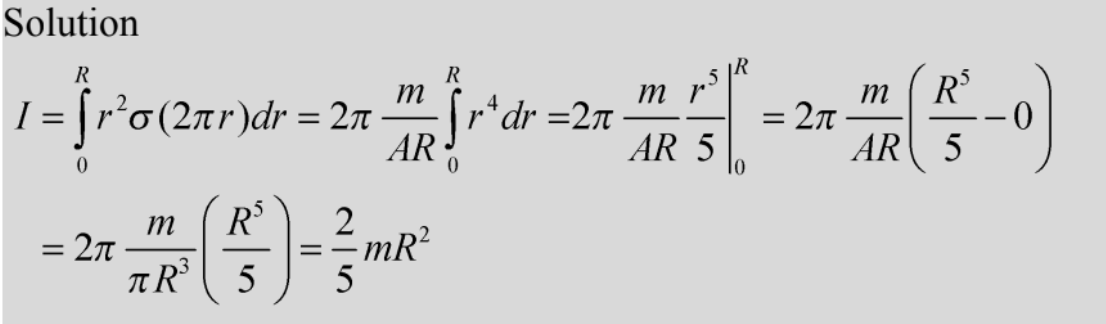

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_10_Fixed_Axis_Rotation_15/123/q.png"
prompt = (
        "Don't solve the question yet. "
        "Describe what you observe in the figure AND "
        "state your assumptions about the problem"
    )
resp = chat_turn(prompt, image_paths=[img_path])
print(resp)

Observations:
- A flat circular disk is shown, radius R and total mass m.
- A vertical axis passes through the disk’s center and is perpendicular to the disk (rotation axis).
- A radial coordinate r is drawn from the center to a point in the disk.
- Surface mass density is labeled σ = (m r)/(A R), i.e., it increases linearly with radius.

Assumptions:
- The disk is thin (planar), rigid, and continuous with no holes.
- The density depends only on the distance r from the center (azimuthal symmetry).
- Total area A = πR^2; m is the total mass obtained by integrating σ over the disk.
- In calculations one may use ring elements of area dA = 2πr dr.
- The moment of inertia sought is about the central axis normal to the disk.


In [ ]:
prompt = (
        "Correction: "
        "This specific assumption is wrong: m is the total mass obtained by integrating σ over the disk. "
        "You must use the given density formula exactly as written and ignore the fact that it does not integrate to the total mass m"
    )
resp = chat_turn(prompt)
print(resp)

Acknowledged.

Revised assumptions:
- Use σ(r) = (m r)/(A R) exactly as given, treating m as a parameter in the formula, not necessarily equal to the disk’s actual total mass from integrating σ.
- Disk is thin, rigid, circular of radius R and area A (take A = πR^2 unless told otherwise).
- Density depends only on radius r (azimuthal symmetry).
- Axis is through the center, perpendicular to the disk.
- For calculation, use concentric rings with dA = 2πr dr.


In [ ]:
prompt = (
        "Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Step 1: Use ring elements.
- dA = 2π r dr
- σ(r) = (m r)/(A R)
- dm = σ dA = (m r)/(A R) · 2π r dr = (2π m/(A R)) r^2 dr

Step 2: Moment of inertia about central axis.
I = ∫ r^2 dm = ∫_0^R r^2 · (2π m/(A R)) r^2 dr
= (2π m/(A R)) ∫_0^R r^4 dr
= (2π m/(A R)) · (R^5/5)
= (2π m R^4)/(5A)

With A = πR^2, I = (2/5) m R^2.


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###77

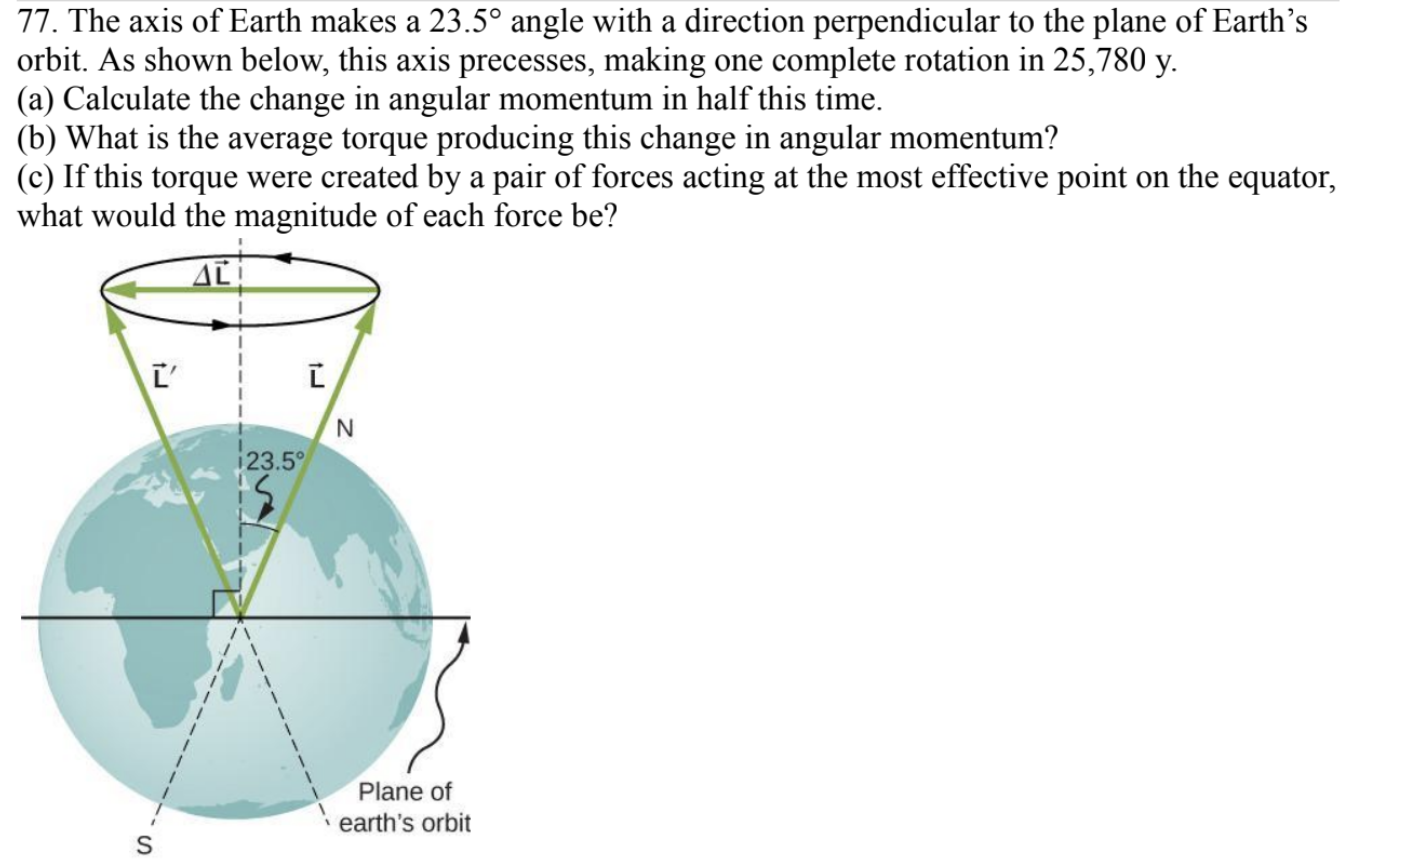

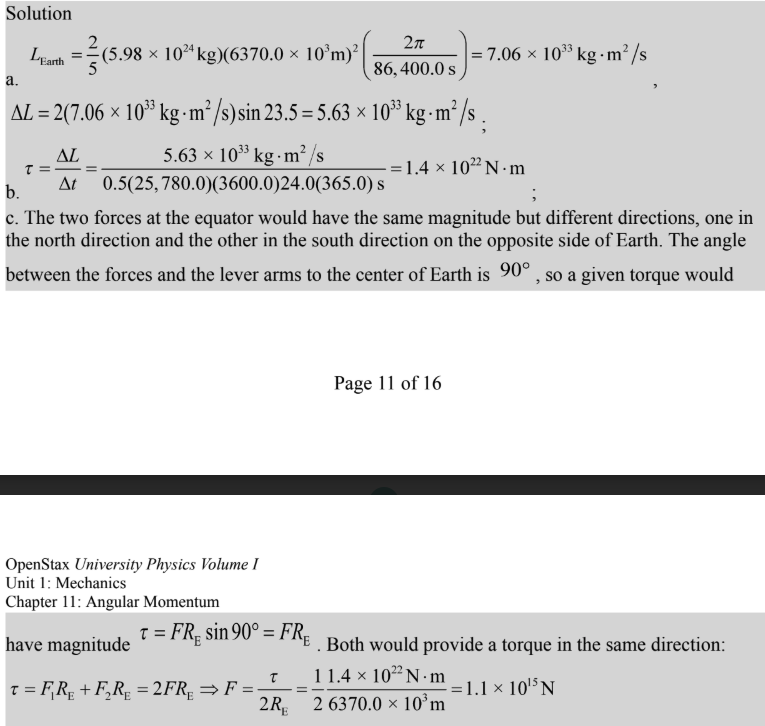

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_11_Angular_Momentum_6/77/q.png"
prompt = (
        "Don't solve the question yet. "
        "Describe what you observe in the figure AND "
        "state your assumptions about the problem"
    )
resp = chat_turn(prompt, image_paths=[img_path])
print(resp)

Observations about the figure
- The Earth’s spin axis is tilted by 23.5° from the direction perpendicular to the plane of Earth’s orbit (the ecliptic normal).
- The angular momentum vector L keeps the same magnitude but its direction slowly precesses, tracing a cone around the ecliptic normal.
- Over half a precession cycle the tip of L moves to the opposite side of the cone; the diagram labels the vector difference as ΔL along the circular path.
- N and S mark the poles; the “most effective point on the equator” means a point with maximum lever arm relative to the torque causing precession.

Assumptions for the problem
- Treat Earth as a rigid body with constant spin rate; the magnitude of L = Iω is constant while only its direction changes.
- Use Earth’s mass M ≈ 5.97×10^24 kg, mean radius R ≈ 6.37×10^6 m.
- Moment of inertia about the spin axis: either realistic I ≈ 0.3308 MR^2 (preferred) or, if a uniform sphere is intended, I = (2/5)MR^2; I will state which value is used if number

In [ ]:
prompt = (
        "Correction: "
        "This assumption is wrong: Sidereal day for ω: ω = 2π/(86164 s). "
        "Assume the rotation period is exactly 24 hours ($86,400$ s). "
        "This assumption is wrong: Moment of inertia about the spin axis: either realistic I ≈ 0.3308 MR^2 (preferred) "
        "Assume Earth strictly as a uniform sphere with I = 2/5 MR^2 "
        "You must use the given density formula exactly as written and ignore the fact that it does not integrate to the total mass m"
    )
resp = chat_turn(prompt)
print(resp)

Got it. Updated assumptions to use for this problem:
- Earth’s rotation period: exactly 24 h = 86,400 s, so ω = 2π/86,400 s⁻¹.
- Treat Earth as a uniform solid sphere with I = (2/5) M R² about the spin axis.
- Use the provided density formula exactly as written (even if it doesn’t integrate to M).
- Other earlier points kept: tilt 23.5°, precession period 25,780 y; L’s magnitude constant, direction precesses; average torque τ = ΔL/Δt; for the equatorial force couple, τ = 2 F R.


In [ ]:
prompt = (
        "Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Step 1: Angular momentum magnitude
- Use I = (2/5)MR^2, ω = 2π/86400 s⁻¹
- M = 5.972×10^24 kg, R = 6.371×10^6 m
I = 0.4(5.972×10^24)(6.371×10^6)^2 ≈ 9.70×10^37 kg·m^2
L = Iω ≈ (9.70×10^37)(7.272×10^−5) ≈ 7.06×10^33 kg·m^2/s

Step 2: Change in L in half a precession
- Axis tip moves π in azimuth on a cone of half-angle θ = 23.5°
- Angle between initial and final L is 2θ; |ΔL| = 2L sinθ
|ΔL| = 2(7.06×10^33) sin 23.5° ≈ 5.62×10^33 kg·m^2/s

Step 3: Average torque
- Half precession time: (25780 y)/2 = 12890 y
- Take 1 y = 365.25 d = 3.15576×10^7 s → Δt ≈ 4.07×10^11 s
τ_avg = |ΔL|/Δt ≈ (5.62×10^33)/(4.07×10^11) ≈ 1.38×10^22 N·m

Step 4: Force pair at equator
- Max couple: τ = 2FR → F = τ/(2R)
F ≈ (1.38×10^22)/(2×6.371×10^6) ≈ 1.1×10^15 N each

Answers:
(a) |ΔL| ≈ 5.6×10^33 kg·m^2/s
(b) τ_avg ≈ 1.4×10^22 N·m
(c) Each force ≈ 1.1×10^15 N


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###39

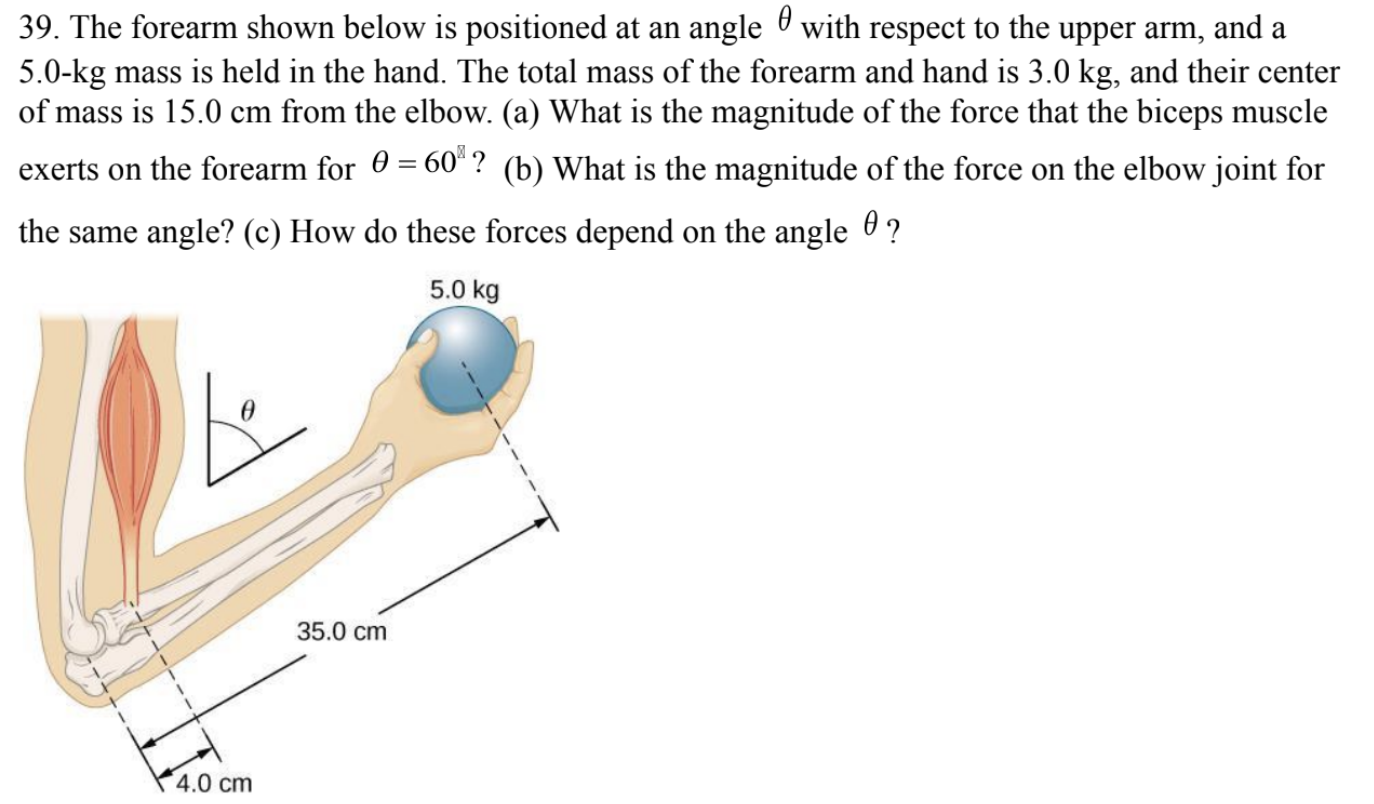

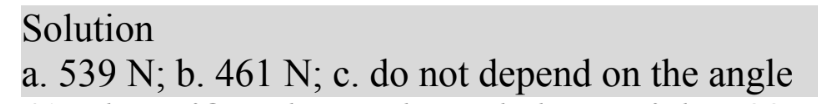

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/39/q.png"
prompt = (
        "Don't solve the question yet. "
        "Describe what you observe in the figure AND "
        "state your assumptions about the problem"
    )
resp = chat_turn(prompt, image_paths=[img_path])
print(resp)

Observations from the figure:
- A forearm is bent upward, making an angle θ with the upper arm.
- A 5.0‑kg mass is held in the hand; its weight acts vertically downward.
- The hand is about 35.0 cm from the elbow (distance from elbow pivot to the load).
- The biceps tendon attaches near the elbow with a small lever arm; the perpendicular moment arm is 4.0 cm from the elbow.
- The forearm/hand itself has mass 3.0 kg with center of mass located 15.0 cm from the elbow (not drawn to scale).
- The dashed vertical line through the ball indicates the line of action of its weight.

Assumptions for the problem:
- The forearm is in static equilibrium (no angular or linear acceleration).
- The elbow acts as a frictionless pivot.
- The biceps force acts along a line whose perpendicular distance to the elbow is 4.0 cm (moment arm constant with θ).
- Only three external forces on the forearm are considered: biceps tension at the tendon, the elbow joint reaction, and the weights of the 5.0‑kg mass an

In [ ]:
prompt = (
        "Correction: "
        "The biceps exerts a force that acts vertically upward (parallel to the upper arm), "
        "applied at a distance of 4.0 cm along the forearm. "
    )
resp = chat_turn(prompt)
print(resp)

Got it. Updated assumptions:
- Biceps force is vertical upward (parallel to upper arm), applied at a point 4.0 cm from the elbow along the forearm; its moment arm about the elbow equals 4.0 cm·sin(θ) relative to the forearm axis.
- Other assumptions unchanged: static equilibrium, elbow is a pivot; external forces are biceps tension, elbow joint reaction, weight of the 5.0‑kg mass at 35.0 cm, and weight of the 3.0‑kg forearm/hand at 15.0 cm, all weights vertical downward, g ≈ 9.8 m/s², rigid planar forearm.


In [ ]:
prompt = (
        "Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Step 1: Torques about the elbow (counterclockwise positive)
- All applied forces (biceps upward; two weights downward) act vertically.
- Perpendicular lever arm for a point at distance r on the forearm is r sinθ.
- Set net torque to zero:

F_b(0.040) sinθ − [ (5.0g)(0.35) sinθ + (3.0g)(0.15) sinθ ] = 0

sinθ cancels:

F_b = [ (5.0g)(0.35) + (3.0g)(0.15) ] / 0.040
    ≈ [ 49(0.35) + 29.4(0.15) ] / 0.040
    ≈ 21.56 / 0.040 ≈ 5.39 × 10^2 N

(a) Biceps force at θ = 60°: 5.4 × 10^2 N (upward). 

Step 2: Force balance (vertical)
R_elbow + F_b − (5.0g + 3.0g) = 0
R_elbow = (5.0g + 3.0g) − F_b ≈ 78.4 − 539 ≈ −4.61 × 10^2 N

(b) Magnitude of elbow-joint force: 4.6 × 10^2 N, directed downward on the forearm.

(c) θ-dependence
Because each vertical force has the same r sinθ moment arm factor, sinθ cancels in the torque equation. Therefore both the biceps force and the elbow-joint force are independent of θ (for this “biceps vertical” model).


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]